# Figure 2: Validation of the colocation of RiverAtlas and WHONDRS data

RiverAltas and WHONDRS S19S both have stream order at each site. Checking the relationship between the stream order values at each site is one way of checking that the colocation of RiverAtlas river segments matches the WHONDRS sites.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load data
colocated_df = pd.read_csv('WHONDRS_S19S_colocated_for_verification.csv')

# Replace any missing (empty string) with NaN
colocated_df.replace(' ',np.NaN,inplace=True)

# Remove any missing data
colocated_df.dropna(axis=0,subset=['WH_SO','RA_SO'],how='any',inplace=True)

# Convert from strings to numbers
colocated_df['WH_SO'] = colocated_df['WH_SO'].astype(int)
colocated_df['RA_SO'] = colocated_df['RA_SO'].astype(int)

colocated_df['my_lm'] = colocated_df['my_lm'].astype(float)
colocated_df['RA_lm'] = colocated_df['RA_lm'].astype(float)

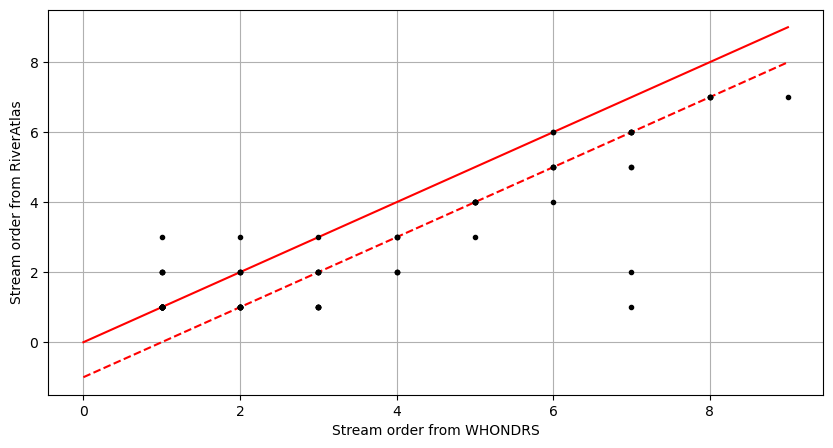

In [3]:
#fig, [ax0,ax1] = plt.subplots(1,2,figsize=(10,5))
fig, ax0 = plt.subplots(1,1,figsize=(10,5))

ax0.plot([0,9],[0,9],'r')
ax0.plot([0,9],[-1,8],'r--')
ax0.plot(colocated_df['WH_SO'],colocated_df['RA_SO'],'k.')
ax0.grid()

ax0.set_xlabel('Stream order from WHONDRS')
ax0.set_ylabel('Stream order from RiverAtlas')

#ax1.plot([0,18],[0,18],'r')
#ax1.plot(colocated_df['my_lm']/1000,colocated_df['RA_lm'],'k.')
#ax1.grid()
#
#ax1.set_xlabel('River segment length computed from coordinates (km)')
#ax1.set_ylabel('River segment length reported in RiverAtlas (km)')

plt.savefig('fig02_colocation_validation.pdf')